In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 

# **Importing cleaned data**

In [39]:
# Loading cleaned data file
df = pd.read_csv('data/zippedData/studio_gross.csv')

# **Review of Gross data (by studio)**

In [40]:
df.head()

,studio,domestic_gross,foreign_gross,total_gross
0,BV,415000000.0,652000000.0,1.067000e+09
1,BV,334200000.0,691300000.0,1.025500e+09
2,WB,296000000.0,664300000.0,9.603000e+08
3,WB,292600000.0,535700000.0,8.283000e+08
4,P/DW,238700000.0,513900000.0,7.526000e+08


In [41]:
top10 = df.studio.value_counts().head(10)

In [42]:
top10

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

# Sum of totals by studio

In [43]:
df.groupby(['studio']).sum()

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,6100000.0,9900000.0,16000000.0
A23,164200.0,0.0,164200.0
A24,324194200.0,238462200.0,562656400.0
ADC,248200.0,0.0,248200.0
AF,2142900.0,3500000.0,5642900.0
...,...,...,...
XL,458000.0,0.0,458000.0
YFG,1100000.0,0.0,1100000.0
Yash,31631400.0,272825100.0,304392100.0


# sorting and aggregating top 10 studios

In [46]:
df_aggre = df.groupby(['studio']).agg('sum')
df_aggre.head()

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,6100000.0,9900000.0,16000000.0
A23,164200.0,0.0,164200.0
A24,324194200.0,238462200.0,562656400.0
ADC,248200.0,0.0,248200.0
AF,2142900.0,3500000.0,5642900.0


In [47]:
#Identifying the top 10 performing studios
df_aggre=df_aggre.sort_values('total_gross',ascending = False).head(10)

In [48]:
df_aggre

,domestic_gross,foreign_gross,total_gross
studio,,,
BV,1.841903e+10,2.579385e+10,4.421288e+10
Fox,1.094950e+10,2.005587e+10,3.100537e+10
WB,1.216805e+10,1.866790e+10,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,2.975716e+10
Sony,8.459683e+09,1.394535e+10,2.240492e+10
Par.,7.685871e+09,1.186338e+10,1.954926e+10
WB (NL),3.995700e+09,6.339000e+09,1.033470e+10
LGF,4.118963e+09,4.482619e+09,8.594583e+09
LG/S,2.078200e+09,3.353724e+09,5.431924e+09


#### Plot bar chart for top 10 studios on gross revenue with a split between domestic and foreign gross 

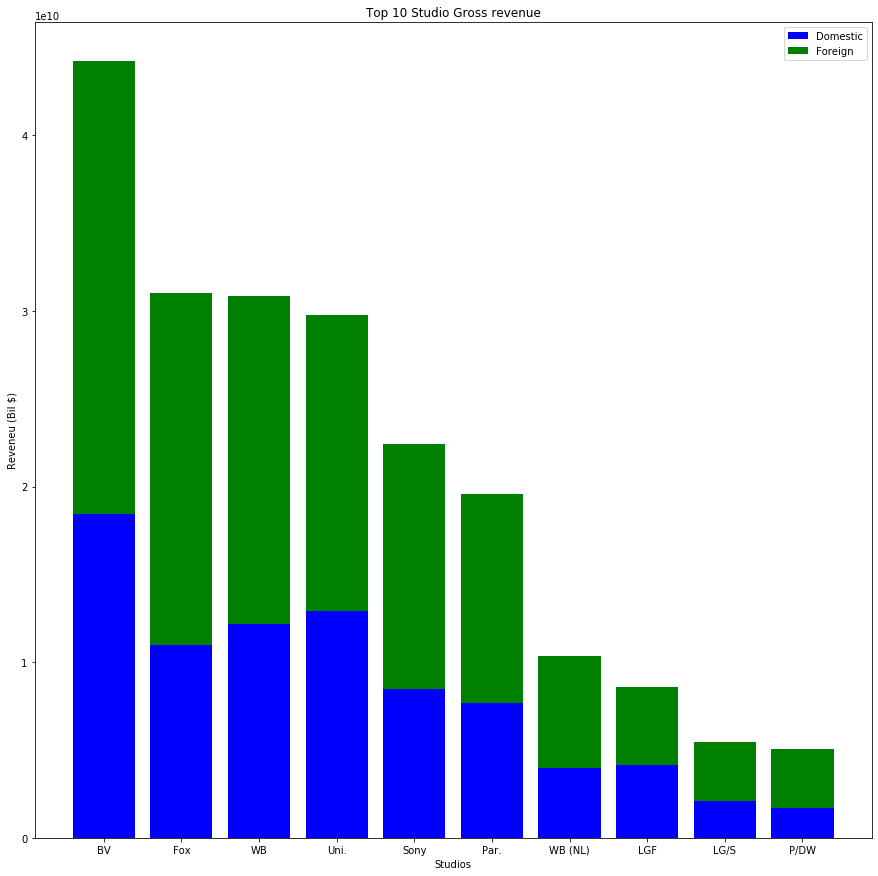

In [54]:
#  Plot data
plt.figure(figsize = (15,15) )

studios = df_aggre.index
dom_gross= df_aggre.domestic_gross
fore_gross = df_aggre.foreign_gross
total_gross = df_aggre.total_gross

plt.bar(range(len(studios)), dom_gross, color = 'blue')
plt.bar(range(len(studios)),fore_gross, color = 'green',bottom=dom_gross)
plt.title('Top 10 Studio Gross revenue')

plt.xlabel('Studios')
plt.ylabel('Reveneu (Bil $)')
plt.xticks(range(len(studios)),studios)

plt.legend(['Domestic','Foreign'])
plt.show()

### Genre analysis

In [55]:
#Loading data file
df_ititlebas = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')

In [56]:
df_ititlebas.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [57]:
#Loading cleaned data file with profit/loss info
df_box_profit = pd.read_csv('data/zippedData/tn.movie_budget_working.csv')

In [58]:
df_box_profit.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


In [59]:
df_ititlebas.drop(columns=['runtime_minutes','tconst'],inplace=True)

In [60]:
df_ititlebas.head()

,primary_title,original_title,start_year,genres
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [62]:
filtered = df_ititlebas['genres'].str.contains('Drama',na = False)

In [63]:
df_ititlebas.loc[filtered]

,primary_title,original_title,start_year,genres
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146124,The Holden Family Plan,The Holden Family Plan,2019,"Drama,Family"
146132,The Last White Witch,The Last White Witch,2019,"Comedy,Drama,Fantasy"
146135,The Rehearsal,O Ensaio,2019,Drama
146137,Safeguard,Safeguard,2019,"Drama,Thriller"


In [64]:
df_ititlebas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
primary_title     146144 non-null object
original_title    146123 non-null object
start_year        146144 non-null int64
genres            140736 non-null object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [65]:
df_box_profit.set_index('movie',inplace=True)
df_box_profit.head()

,Unnamed: 0,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable
movie,,,,,,,,,
Avatar,0,1,"Dec 18, 2009",425000000,760507625,2776345279,2015837654,2351345279,True
Pirates of the Caribbean: On Stranger Tides,1,2,"May 20, 2011",410600000,241063875,1045663875,804600000,635063875,True
Dark Phoenix,2,3,"Jun 7, 2019",350000000,42762350,149762350,107000000,-200237650,False
Avengers: Age of Ultron,3,4,"May 1, 2015",330600000,459005868,1403013963,944008095,1072413963,True
Star Wars Ep. VIII: The Last Jedi,4,5,"Dec 15, 2017",317000000,620181382,1316721747,696540365,999721747,True


In [66]:
#Merging profit and movie info files
merged_data = pd.merge(left=df_box_profit,right=df_ititlebas,left_on = 'movie',right_on ='primary_title')
merged_data.head()

,Unnamed: 0,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable,primary_title,original_title,start_year,genres
0,0,1,"Dec 18, 2009",425000000,760507625,2776345279,2015837654,2351345279,True,Avatar,Abatâ,2011,Horror
1,1,2,"May 20, 2011",410600000,241063875,1045663875,804600000,635063875,True,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,2,3,"Jun 7, 2019",350000000,42762350,149762350,107000000,-200237650,False,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,3,4,"May 1, 2015",330600000,459005868,1403013963,944008095,1072413963,True,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,6,7,"Apr 27, 2018",300000000,678815482,2048134200,1369318718,1748134200,True,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


In [68]:
# cleanup of merged data
merged_data.drop(columns = ['start_year','release_date','Unnamed: 0','original_title'], inplace=True)
merged_data.head()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable,primary_title,genres
0,1,425000000,760507625,2776345279,2015837654,2351345279,True,Avatar,Horror
1,2,410600000,241063875,1045663875,804600000,635063875,True,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,3,350000000,42762350,149762350,107000000,-200237650,False,Dark Phoenix,"Action,Adventure,Sci-Fi"
3,4,330600000,459005868,1403013963,944008095,1072413963,True,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
4,7,300000000,678815482,2048134200,1369318718,1748134200,True,Avengers: Infinity War,"Action,Adventure,Sci-Fi"


In [87]:
profit_counter = []

In [89]:
# logic to find the most profitable genres
filtered = (merged_data['genres'].str.contains('Drama', na=False)) & (merged_data['profitable'] == True)
profit_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Action', na=False)) & (merged_data['profitable'] == True)
profit_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Documentary', na=False)) & (merged_data['profitable'] == True)
profit_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Adventure', na=False)) & (merged_data['profitable'] == True)
profit_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Sci-Fi', na=False)) & (merged_data['profitable'] == True)
profit_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Comedy', na=False)) & (merged_data['profitable'] == True)
profit_counter.append(len(merged_data.loc[filtered].index))

In [88]:
loss_counter = []

In [90]:
# Logic to find the least profitable genres
filtered = (merged_data['genres'].str.contains('Drama', na=False)) & (merged_data['profitable'] == False)
loss_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Action', na=False)) & (merged_data['profitable'] == False)
loss_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Documentary', na=False)) & (merged_data['profitable'] == False)
loss_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Adventure', na=False)) & (merged_data['profitable'] == False)
loss_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Sci-Fi', na=False)) & (merged_data['profitable'] == False)
loss_counter.append(len(merged_data.loc[filtered].index))
filtered = (merged_data['genres'].str.contains('Comedy', na=False)) & (merged_data['profitable'] == False)
loss_counter.append(len(merged_data.loc[filtered].index))

#### Plotting time :)

In [140]:
# Validation of merged data
filtered = (merged_data['genres'].str.contains('Drama', na=False)) 
merged_data[filtered].profitable.value_counts(normalize = True)


True     0.560264
False    0.439736
Name: profitable, dtype: float64

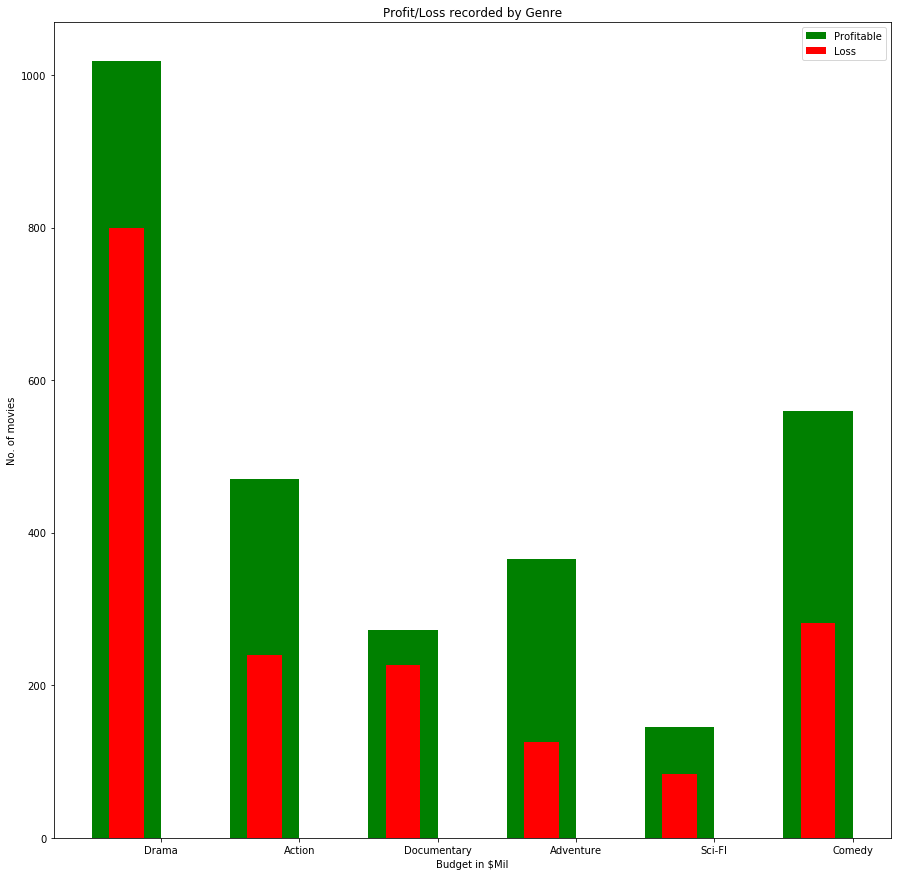

In [99]:
# Plot data
index = ['Drama','Action','Documentary','Adventure','Sci-FI','Comedy']
width =.5
plt.figure(figsize=(15,15))
indices = np.arange (len(index))

plt.bar(index, profit_counter, width=width, color = 'green', label = 'Profitable')
plt.bar(index, loss_counter, width=width/2, color = 'red', alpha = 1, label = 'Loss')
plt.xticks(indices+width/2, index)

plt.title('Profit/Loss recorded by Genre')
plt.xlabel('Budget in $Mil') # change to genre
plt.ylabel('No. of movies')
plt.legend()
plt.show()


#### Budget analysis and impact on profitability

In [101]:
df_box_profit.head()

,Unnamed: 0,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable
movie,,,,,,,,,
Avatar,0,1,"Dec 18, 2009",425000000,760507625,2776345279,2015837654,2351345279,True
Pirates of the Caribbean: On Stranger Tides,1,2,"May 20, 2011",410600000,241063875,1045663875,804600000,635063875,True
Dark Phoenix,2,3,"Jun 7, 2019",350000000,42762350,149762350,107000000,-200237650,False
Avengers: Age of Ultron,3,4,"May 1, 2015",330600000,459005868,1403013963,944008095,1072413963,True
Star Wars Ep. VIII: The Last Jedi,4,5,"Dec 15, 2017",317000000,620181382,1316721747,696540365,999721747,True


In [105]:
# Logic to identify profit and loss by genre

count_profit = []
count_loss = []

count_profit.append(len(df_box_profit[(df_box_profit['profitable'] == True) & (df_box_profit['production_budget'] < 10000000)].index))
count_profit.append(len(df_box_profit[(df_box_profit['profitable'] == True) & (df_box_profit['production_budget'] >= 10000000) & (df_box_profit['production_budget'] <=20000000)].index))
count_profit.append(len(df_box_profit[(df_box_profit['profitable'] == True) & (df_box_profit['production_budget'] >= 20000000) & (df_box_profit['production_budget'] <=50000000)].index))
count_profit.append(len(df_box_profit[(df_box_profit['profitable'] == True) & (df_box_profit['production_budget'] >= 50000000) & (df_box_profit['production_budget'] <=100000000)].index))
count_profit.append(len(df_box_profit[(df_box_profit['profitable'] == True) & (df_box_profit['production_budget'] >= 100000000) & (df_box_profit['production_budget'] <=200000000)].index))
count_profit.append(len(df_box_profit[(df_box_profit['profitable'] == True) & (df_box_profit['production_budget'] > 200000000)].index))

count_profit


count_loss.append(len(df_box_profit[(df_box_profit['profitable'] == False) & (df_box_profit['production_budget'] < 10000000)].index))
count_loss.append(len(df_box_profit[(df_box_profit['profitable'] == False) & (df_box_profit['production_budget'] >= 10000000) & (df_box_profit['production_budget'] <=20000000)].index))
count_loss.append(len(df_box_profit[(df_box_profit['profitable'] == False) & (df_box_profit['production_budget'] >= 20000000) & (df_box_profit['production_budget'] <=50000000)].index))
count_loss.append(len(df_box_profit[(df_box_profit['profitable'] == False) & (df_box_profit['production_budget'] >= 50000000) & (df_box_profit['production_budget'] <=100000000)].index))
count_loss.append(len(df_box_profit[(df_box_profit['profitable'] == False) & (df_box_profit['production_budget'] >= 100000000) & (df_box_profit['production_budget'] <=200000000)].index))
count_loss.append(len(df_box_profit[(df_box_profit['profitable'] == False) & (df_box_profit['production_budget'] > 200000000)].index))

count_loss

buckets = 6


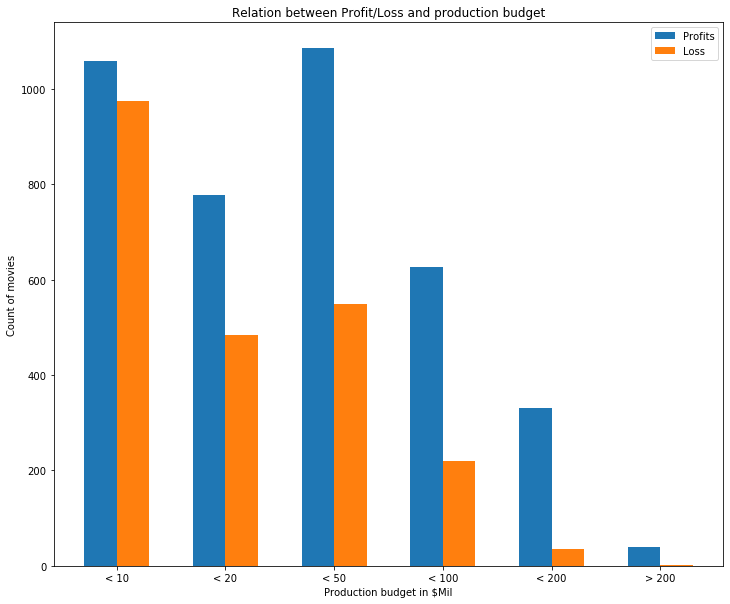

In [141]:
# Plotting data
labels = ['< 10','< 20','< 50','< 100','< 200','> 200']
plt.figure(figsize=(12,10))
ind = np.arange(buckets)
width = 0.3

plt.bar(ind,count_profit,width, label='Profits')
plt.bar(ind+width, count_loss, width, label = 'Loss')
plt.xlabel('Production budget in $Mil')
plt.ylabel('Count of movies')
plt.legend(loc='best')

plt.title('Relation between Profit/Loss and production budget')
plt.xticks(ind+width/2, (labels))

plt.show()

#### Loss breakdown by release type(domestic only vs foreign only vs total unreleased)  

In [118]:
# Loading cleaned data file
df_rt_budget = pd.read_csv('data/zippedData/tn.movie_budget_working.csv')

In [119]:
df_rt_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
Unnamed: 0           5782 non-null int64
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
foreign_gross        5782 non-null int64
profit_loss          5782 non-null int64
profitable           5782 non-null bool
dtypes: bool(1), int64(7), object(2)
memory usage: 412.3+ KB


In [120]:
df = df_rt_budget
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


In [121]:
df['profitable'].value_counts()

True     3657
False    2125
Name: profitable, dtype: int64

In [122]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [123]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


In [125]:
# Validation of logic to be built
df[(df['domestic_gross']==0) & (df['foreign_gross']==0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,profitable
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,False
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,0,-75000000,False
...,...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,False
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,False
5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,False
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,False


In [130]:
#unreleased logic
df_agg_loss = df[(df['domestic_gross']==0) & (df['foreign_gross']==0)]
df_agg_loss.profit_loss.sum()

-2277558580

In [131]:
# domestic release with loss
df_dom_only = df.loc[(df['domestic_gross']!=0) & (df['foreign_gross'] == 0) & (df['profitable']==False)]
df_dom_only.profit_loss.sum()

-6741494633

In [132]:
# foreign release with loss
df_fore_only = df.loc[(df['domestic_gross']==0) & (df['foreign_gross'] != 0) & (df['profitable']==False)]
df_fore_only.profit_loss.sum()

-1317770255

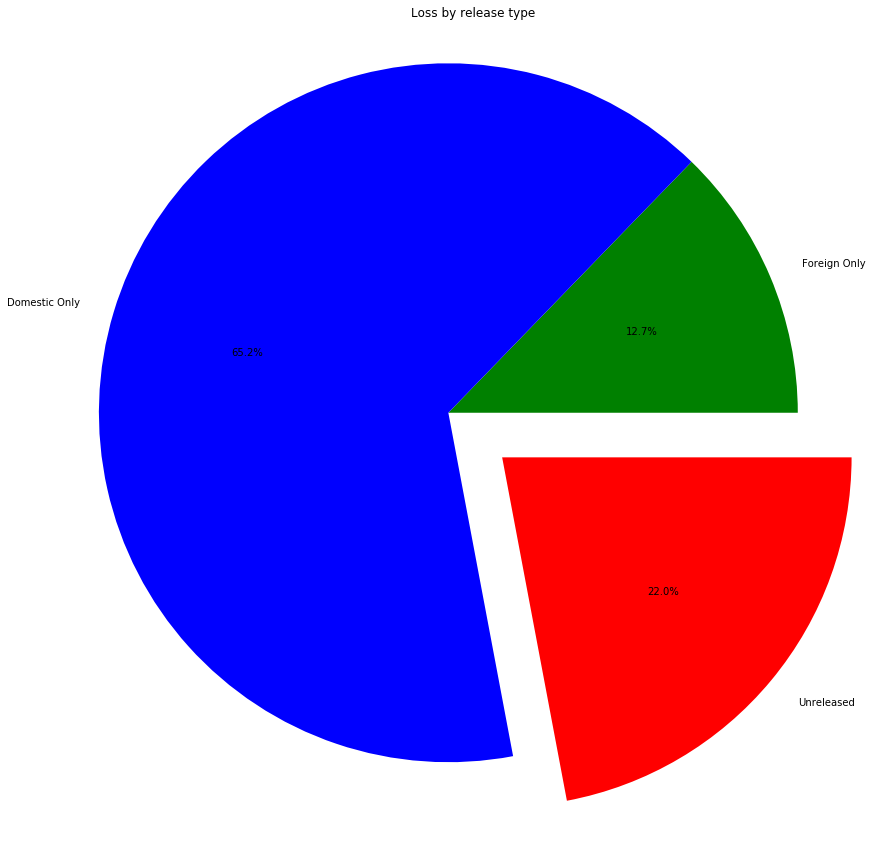

In [137]:
# plot losses in pie chart
categories = ['Foreign Only','Domestic Only','Unreleased']
loss = [abs(df_fore_only.profit_loss.sum()),abs(df_dom_only.profit_loss.sum()), abs(df_agg_loss.profit_loss.sum()) ]
color = ['green','blue','red']

plt.figure(figsize=(15,15))
plt.pie(loss,explode=(0, 0, 0.2),labels=categories, autopct='%1.1f%%', colors=color)

plt.axis('scaled')
plt.title('Loss by release type')

plt.show()